In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

UsageError: Line magic function `%` not found.


In [2]:
df = pd.read_csv('data/course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [3]:
df.describe()

,id,duration
count,4074.000000,4049.000000
mean,563931.437899,123.459146
std,216580.454716,72.534894
min,182960.000000,0.013856
25%,378821.750000,67.108378
50%,564200.000000,118.715856
75%,753503.750000,172.612785
max,937292.000000,421.567520


In [4]:
df.sample(10)

,timestamp,id,group,action,duration
2835,2016-12-14 17:33:42.653534,816620,control,view,170.578062
222,2016-09-30 09:32:14.149407,583724,control,view,57.486327
2683,2016-12-11 05:59:02.191635,460170,experiment,view,197.581284
3038,2016-12-20 04:51:22.796463,546338,experiment,view,264.870545
530,2016-10-08 13:47:41.849164,545230,experiment,view,167.620314
747,2016-10-14 19:52:22.482913,775072,control,view,172.569794
1565,2016-11-09 02:09:16.716300,308561,control,enroll,245.154104
2128,2016-11-25 18:16:31.464579,192921,control,enroll,298.605640
4065,2017-01-18 07:11:22.563679,845571,experiment,enroll,160.567579
1390,2016-11-03 17:17:54.305850,792332,experiment,view,123.268778


In [5]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
control_ctr

0.2364438839848676

In [6]:
# Get dataframe with all records from experiment group
experiment_df = df.query("group=='experiment'")

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query("action=='enroll'")['id'].nunique()/experiment_df.query("action=='view'")['id'].nunique()

# Display click through rate
experiment_ctr

0.2668693009118541

In [7]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr-control_ctr

# Display observed difference
obs_diff

0.030425416926986526

In [8]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)


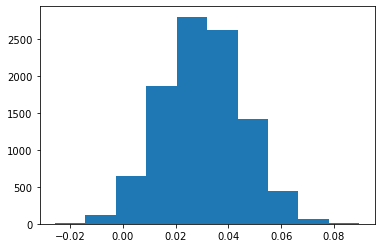

In [9]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

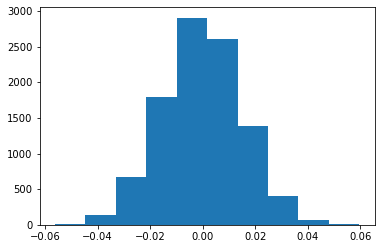

In [10]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),diffs.size)

# Plot the null distribution
plt.hist(null_vals);

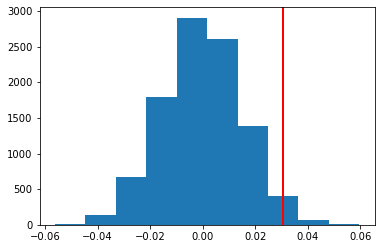

In [11]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(obs_diff,color='r',linewidth=2);


In [12]:
# Compute p-value
p=(null_vals>obs_diff).mean()
p

0.0203